In [3]:
import sys
sys.path.append("/Users/carla/Desktop/GitHub/Projet-RNCP") 
import pandas as pd
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from src.utils.transformation import *

# Données réelles

In [4]:
df = pd.read_csv('database_clean.csv',parse_dates=['publishedAt','extractedAt'])
df = df.dropna(subset=['comment'])
df['comment_length'] = df['comment'].str.len()
df.head(16)

,channelId,videoId,author,publishedAt,comment,extractedAt,tokens_clean_lem,comment_clean_lem,comment_length
0,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@SEBFRIT,2025-06-02 19:21:45+00:00,Merci à Odoo le sponsor cette vidéo ! Pour déc...,2025-07-01 11:46:10,"['odoo', 'sponsor', 'decouvrir', 'odoo', 'cliq...",odoo sponsor decouvrir odoo clique decouverte ...,202
1,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@guishoo4700,2025-06-30 18:45:12+00:00,Fait une vidéo sur Tyler the creator stp,2025-07-01 11:46:10,"['video_sur', 'tyler_the_creator']",video_sur tyler_the_creator,40
2,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Remi-B-Goode,2025-06-30 16:35:49+00:00,Lol le disclaimer😂,2025-07-01 11:46:10,"['mort_de_rire', 'disclaimer']",mort_de_rire disclaimer,18
3,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Guaph,2025-06-29 20:17:58+00:00,"où peut-on voir la série ""Earn and Alfred"" ???",2025-07-01 11:46:10,"['voir', 'serie', 'earn', 'alfred']",voir serie earn alfred,46
4,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@rockman156,2025-06-29 19:05:12+00:00,C'est pas un re upload ? Impression de déjà vu...,2025-07-01 11:46:10,"['reupload', 'impression', 'deja_vu', 'critiqu...",reupload impression deja_vu critique foireux i...,110
5,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@r_bin,2025-06-29 16:30:34+00:00,fais une vidéo sur tyler the creator stpppppppp,2025-07-01 11:46:10,"['video_sur', 'tyler_the_creator', 'stp']",video_sur tyler_the_creator stp,47
6,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@collet_1311,2025-06-29 05:15:45+00:00,C est pas SEB c est un robot 😅😅😅,2025-07-01 11:46:10,['robot'],robot,32
7,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@vladimiro.6067,2025-06-28 11:45:19+00:00,"Super vidéo comme d’hab, mais je trouve comme ...",2025-07-01 11:46:10,"['super', 'habitude', 'trouver', 'trop', 'indi...",super habitude trouver trop individualiste arr...,244
8,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@CopainCodex,2025-06-28 02:33:23+00:00,la coiffure et le rasage ne me dérange pas le ...,2025-07-01 11:46:10,"['coiffure', 'rasage', 'deranger', 'monde', 'c...",coiffure rasage deranger monde contre gresille...,134
9,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@clem2023,2025-06-27 17:28:13+00:00,Super vidéo Seb merci vraiment mais par contre...,2025-07-01 11:46:10,"['super', 'vraiment', 'contre', 'faillir', 'ta...",super vraiment contre faillir taper tete contr...,151


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(1730, 9)

# Données d'entrainement

In [7]:
df_train = pd.read_csv('../data/french_tweets.csv') # les tweets
df_train2 = pd.read_csv('/Users/carla/Downloads/partial_translation_1754977652.csv') # les commentaires youtube traduits en français
df_test = pd.read_csv('/Users/carla/Desktop/GitHub/Projet-RNCP/data/youtube_comments_cleaned.csv') # les commentaires youtube en anglais

In [8]:
df_test.head(100)

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ugy5Y7edoMhCHlJm1vh4AaABAg_aug,_03VKmdrxV8,Ionic + React - Tutorial for Beginners,AugmentedUser,AugmentedCID,Excellent video. Could you please provide guid...,Neutral,0,0,2025-02-05 11:09:27,DE,27
96,UgyNsBnFzaByityYCO14AaABAg,lLFhNZ-xtoc,Elon Musk Suffers MENTAL BREAKDOWN | The Kyle ...,@aguy6833,UCD2wqsTSkzEBrxruV5LYmVg,Bring On The Lucie (Freda Peeple),Neutral,0,0,2025-01-04 08:09:38,US,25
97,Ugy_-jurKgkbX-OCUe94AaABAg,BwuLxPH8IDs,TypeScript Course for Beginners - Learn TypeSc...,@prisinha,UCnYFO_keWE77suo9H1Jtxmw,2:36:36 ctrl space to view list of available d...,Neutral,0,0,2022-01-22 21:45:51,DE,27
98,UgyWIQAmFxJboTKir1Z4AaABAg,LpBitoIFRDE,The trickshot that changed my life #trickshots...,@Brgsw,UCfClhprJbE4RfFyErz4F1rA,Orangutany 😂,Negative,0,0,2025-01-11 14:37:26,GB,17


In [ ]:
df_test.head()

In [57]:
from langdetect import detect
# filtre de data set sur les commentaires en anglais
def safe_detect(text):
    try:
        return detect(text.strip()) if isinstance(text, str) and text.strip() else None
    except Exception as e:
        return None  # Return None if detection fails

df_train2['lang'] = df_train2['CommentText'].apply(safe_detect)
df_train2.head(20)

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID,text_fr,lang
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1,Quelqu'un sait quel film c'est ?,en
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17,Le fait qu'ils se retiennent tout en étant aus...,en
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27,Vous attendez la prochaine vidéo ?,en
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27,Merci pour la grande vidéo. Je ne comprends pa...,en
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2,"C'est comme ça qu'on est en Amérique, à l'exce...",en
5,UgzoTpY5F11FtcooFRR4AaABAg,NnJ4XJdZW4I,The lawyer brilliantly got it out of the way #...,@TrymAndresBernes,UCX_OJCxRZDFELHrLemK4ONw,Dei løk de seim😂,Neutral,0,0,2025-01-14 20:23:42,NZ,1,Dei løk de seim,no
6,UgzJ-2rV0-YNPyMj0u14AaABAg,X4wNLFrv9Co,Which one will you choose to use the cola keyc...,@JasmineHatchel-c3c,UCHvnyO2K7-1oXXdWQh0510g,Number two because it looks the best with it,Positive,0,0,2025-01-10 06:00:19,US,28,Numéro deux parce qu'il semble le meilleur ave...,en
7,UgwuFh4s9cHu3dHrPqJ4AaABAg,sKniMxl9zwo,Trump’s Reaction During ‘Abuse of Power’ Says ...,@StaceyBrown-h6o,UCzTaRiUaLcaLD9I0l2tCBCA,Thank God we don’t have to listen to his drive...,Positive,0,0,2025-01-14 01:24:48,IE,25,"Dieu merci, nous n'avons plus à écouter son dr...",en
8,UgwzYX76p4RK8AHVcYN4AaABAg,yUImrnDqGUk,Thank god this angel found this beautiful dog ...,@cassiegerst6123,UC-QvE5-ZberkWmSYDXLvfQA,Very similar thing happened to me! We lived ne...,Positive,0,0,2025-01-14 03:54:19,AU,15,Nous avons vécu près d'une plage qui avait un ...,en
9,UgzW7h-gmtmgIFFClLJ4AaABAg,5VPxcrvVkBc,He betrayed his own friend - Enjoying a cup of...,@josh_playz2709,UCflV1g1fmgs5i2QZwiaHT8g,im about to cry😢,Negative,0,0,2025-01-13 09:55:03,IE,20,im sur le point de pleurer,en


In [58]:
# retirer les commentaires qui ne sont pas en anglais
df_train2 = df_train2[df_train2['lang'] == 'en']

In [49]:
# le nombre de commentaires (id) par vidéo (videoid) en ordor décroissant du nombre de commentaires
df_test.groupby('VideoID')['CommentID'].count().reset_index().sort_values(by='CommentID', ascending=False)


,VideoID,CommentID
123,0gASceRnltg,1192
1640,Lzccd-ol1Ks,1177
60,-hV6aeyPHPA,1151
1481,JarGs7pGbt8,1090
851,B4pc-6ZKBjg,1003
...,...,...
2168,T5Vo50IT9hc,5
4530,zcCYuF9lQUM,3
3638,n-HVPGEDWwo,3
530,6j5FqstHavw,1


In [59]:
df_test1 = df_test[df_test['VideoID'] == "0gASceRnltg"]
df_test1.shape

(1192, 12)

# Traduction

In [6]:
# # ! pip install sentencepiece
# import sentencepiece
# print("SentencePiece is installed successfully!")
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
# import pandas as pd
# from tqdm import tqdm

# # modèle MarianMT en -> fr
# model_name = "Helsinki-NLP/opus-mt-en-fr"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# def translate_batch(texts, batch_size=32):
#     out = []
#     for i in tqdm(range(0, len(texts), batch_size)):
#         batch = texts[i:i+batch_size]
#         inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
#         translated = model.generate(**inputs, max_length=512)
#         out.extend([tokenizer.decode(t, skip_special_tokens=True) for t in translated])
#     return out


In [7]:
# texts = df_sample["CommentText"].astype(str).tolist()
# translated = translate_batch(texts, batch_size=16)
# df_sample["text_fr"] = translated


In [8]:
# df_sample.head(100)

In [9]:
# df_sample.to_csv("../data/youtube_comments_fr_translated_marian.csv", index=False)

In [10]:
# df_sample = pd.read_csv("../data/youtube_comments_fr_translated_marian.csv")

# classification

In [11]:
df_fr = main_transformation(df_train2, 'text_fr','/Users/carla/Desktop/GitHub/Projet-RNCP/extra_expressions.txt')
df_fr.head()

11:27:36.178 | INFO    | prefect - Starting temporary server on http://127.0.0.1:8437
See https://docs.prefect.io/v3/concepts/server#how-to-guides for more information on running a dedicated Prefect server.

11:27:38.868 | INFO    | Flow run 'elated-ladybug' - Beginning flow run 'elated-ladybug' for flow 'etl_transformation_pipeline'

/Users/carla/Desktop/GitHub/Projet-RNCP/src/utils/transformation.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens_clean_lem'] = df[comment].astype(str).apply(lambda x: preprocessing(x, join=False, path=path))
/Users/carla/Desktop/GitHub/Projet-RNCP/src/utils/transformation.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_clean_lem'] = df[comment].astype(str).apply(lambda x: preprocessing(x, join=True, path=path))


11:34:54.355 | INFO    | Flow run 'elated-ladybug' - Nettoyage des données terminée avec succès.

11:34:56.834 | INFO    | Task run 'w2vec_model_creation-626' - Finished in state Completed()

/Users/carla/Desktop/GitHub/Projet-RNCP/src/utils/transformation.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w2vec_vector'] = df[text].apply(lambda x: get_sentence_vector(x, model))


11:34:57.632 | INFO    | Flow run 'elated-ladybug' - Vectorisation w2vec des données terminée avec succès.

/Users/carla/Desktop/GitHub/Projet-RNCP/src/utils/transformation.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tfidf_vector'] = list(tfidf_matrix.toarray())


11:34:58.670 | INFO    | Task run 'tfidf_vector_creation-c79' - Finished in state Completed()

11:34:58.671 | INFO    | Flow run 'elated-ladybug' - Vectorisation tfidf des données terminée avec succès.

11:34:58.782 | INFO    | Flow run 'elated-ladybug' - Finished in state Completed()

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID,text_fr,tokens_clean_lem,comment_clean_lem,w2vec_vector,tfidf_vector
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1,Quelqu'un sait quel film c'est ?,"[quelque, film]",quelque film,"[-0.006037077, 0.23422411, 0.38110316, 0.07659...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17,Le fait qu'ils se retiennent tout en étant aus...,"[retenir, agressif]",retenir agressif,"[-0.17469569, 0.13004392, 0.21471685, 0.033547...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27,Vous attendez la prochaine vidéo ?,"[attendre, prochain, video]",attendre prochain video,"[-0.21958111, 0.3303907, 0.578335, 0.20313287,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27,Merci pour la grande vidéo. Je ne comprends pa...,"[grand, video, comprendre, continuer, accessib...",grand video comprendre continuer accessible po...,"[-0.2492508, 0.22375743, 0.3475146, 0.12148481...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2,"C'est comme ça qu'on est en Amérique, à l'exce...","[amerique, exception, york]",amerique exception york,"[-0.22173567, 0.09354073, 0.24938838, 0.010123...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
# # vectorisation du texte
# from gensim.models import Word2Vec
# from gensim.utils import simple_preprocess

# # text_fr = pd.read_csv("../data/youtube_comments_fr_translated_marian.csv")

# # Exemple de corpus
# sentences = df_train2['comment_clean_lem'].dropna().tolist()  # Assurez-vous que les commentaires ne sont pas vides

# # Prétraitement (tokenisation simple)
# tokenized_sentences = [simple_preprocess(sent) for sent in sentences]

# # Entraînement Word2Vec (skip-gram)
# model_w2v = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=1)

# # Exemple : obtenir le vecteur pour le mot 'apprendre'
# # vector_apprendre = model_w2v.wv['apprendre']
# # print(f"Vector for 'apprendre' (Word2Vec):\n{vector_apprendre}")

# # Trouver mots similaires
# # similaires = model_w2v.wv.most_similar('apprendre', topn=3)
# # print("Mots les plus similaires à 'apprendre' :", similaires)


In [ ]:
# import inspect
# import sys
# import importlib

# module_name = "src.utils.transformation"

# # Remove the module from the cache
# if module_name in sys.modules:
#     del sys.modules[module_name]

# # Import and reload the module
# from src.utils.transformation import * 

# inspect.signature(main_transformation).parameters

mappingproxy({'df': <Parameter "df">,
              'comment': <Parameter "comment='comment'">,
              'path': <Parameter "path='extra_expressions.txt'">})

In [255]:
# def get_sentence_vector(sentence, model):
#     words = simple_preprocess(sentence)
#     word_vectors = [model.wv[word] for word in words if word in model.wv]
#     if len(word_vectors) > 0:
#         return np.mean(word_vectors, axis=0)  # moyenne des vecteurs
#     else:
#         return np.zeros(model.vector_size)
    
# df_fr['w2vec_vector'] = df_fr['comment_clean_lem'].apply(lambda x: get_sentence_vector(x, model_w2v))

In [6]:
# vectorisation tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
# Exemple de corpus
corpus = df_train2['text_fr'].dropna().tolist()  # Assurez-vous que les commentaires ne sont pas vides
# Initialisation du vecteur TF-IDF
vectorizer = TfidfVectorizer()
# Entraînement du modèle TF-IDF
tfidf_matrix = vectorizer.fit_transform(corpus)
# ajouter une colonne avec les vecteurs TF-IDF
# df_fr['tfidf_vector'] = list(tfidf_matrix.toarray())

# def get_tfidf_vector(df, text='comment_clean_lem'):
#     """
#     Obtenir le vecteur TF-IDF d'une phrase
#     """
#     vectorizer = TfidfVectorizer()
#     corpus = df[text].dropna().tolist()
#     tfidf_matrix = vectorizer.fit_transform(corpus)
#     df['tfidf_vector'] = list(tfidf_matrix.toarray())
#     return df


In [107]:
# # ajouter une colonne avec le texte vectoriser
# df_fr['vector'] = df_fr['comment_clean_lem'].apply(lambda x: model_w2v.wv[simple_preprocess(x)] if pd.notnull(x) else None)
# df_fr.head(10)

ValueError: need at least one array to concatenate

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_fr['Sentiment'].values)
label_encoder.classes_
# Séparation des données en ensembles d'entraînement et de test
x = np.array(df_fr['w2vec_vector'].tolist())
w = np.array(df_fr['text_fr'].tolist())


x_train, x_test, y_train, y_test , w_train, w_test = train_test_split(x, y, w, test_size=0.2, random_state=42)
print(f"Train set size: {len(x_train)}, Test set size: {len(x_test)}")
print(f"les shapes des données d'entraînement et de test: {x_train.shape}, {x_test.shape}")
print(f"les shapes des labels d'entraînement et de test: {y_train.shape}, {y_test.shape}")
print(f"les shapes des texts d'entraînement et de test: {w_train.shape}, {w_test.shape}")
print(label_encoder.classes_)


Train set size: 39998, Test set size: 10000
les shapes des données d'entraînement et de test: (39998, 100), (10000, 100)
les shapes des labels d'entraînement et de test: (39998,), (10000,)
les shapes des texts d'entraînement et de test: (39998,), (10000,)
['Negative' 'Neutral' 'Positive']


In [91]:
accuracy =[]
fscores = []

print("Entraînement des modèles de classification...")

# Entraînement du modèle Random Forest
rf= RandomForestClassifier(n_estimators=100, random_state=42)
# entraienellement du modèle arbre de décision
dt = DecisionTreeClassifier(random_state=42)
# entraienellement du modèle SVM
svm = SVC(kernel='linear', random_state=42)
# entraienellement du modèle régression logistique
lr = LogisticRegression(max_iter=1000, random_state=42)
# entraienellement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)
# entraienellement du modèle Naive Bayes
nb = MultinomialNB()

print("Entraînement du modèle Random Forest...")
rf.fit(x_train, y_train)
# Prédictions sur l'ensemble de test
y_pred_rf = rf.predict(x_test)
# Évaluation du modèle
from sklearn.metrics import classification_report, accuracy_score
print(f"Classification Report\n:{classification_report(y_test, y_pred_rf)}")
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", {acc_rf})
accuracy.append(acc_rf)
fscore_rf = f1_score(y_test, y_pred_rf, average='weighted')
fscores.append(fscore_rf)
print("F1 Score:", fscore_rf)


print("Entraînement du modèle Arbre de Décision...")
dt.fit(x_train, y_train)
# Prédictions sur l'ensemble de test
y_pred_dt = dt.predict(x_test)
# Évaluation du modèle
print(f"Classification Report\n:{classification_report(y_test, y_pred_dt)}")
acc_dt = accuracy_score(y_test, y_pred_dt)
accuracy.append(acc_dt)
print("Accuracy:", acc_dt)
fscore_dt = f1_score(y_test, y_pred_dt, average='weighted')
fscores.append(fscore_dt)
print("F1 Score:", fscore_dt)

print("Entraînement du modèle SVM...")
svm.fit(x_train, y_train)
# Prédictions sur l'ensemble de test
y_pred_svm = svm.predict(x_test)
# Évaluation du modèle
print(f"Classification Report\n:{classification_report(y_test, y_pred_svm)}")
acc_svm = accuracy_score(y_test, y_pred_svm)
accuracy.append(acc_svm)
print("Accuracy:", acc_svm)
fscore_svm = f1_score(y_test, y_pred_svm, average='weighted')
fscores.append(fscore_svm)
print("F1 Score:", fscore_svm)

print("Entraînement du modèle Naive Bayes...")
lr.fit(x_train, y_train)
# Prédictions sur l'ensemble de test
y_pred_lr = lr.predict(x_test)
# Évaluation du modèle
print(f"Classification Report\n:{classification_report(y_test, y_pred_lr)}")
acc_lr = accuracy_score(y_test, y_pred_lr)
accuracy.append(acc_lr)
print("Accuracy:", acc_lr)
fscore_lr = f1_score(y_test, y_pred_lr, average='weighted')
fscores.append(fscore_lr)
print("F1 Score:", fscore_lr)

print("Entraînement du modèle KNN...")
knn.fit(x_train, y_train)
# Prédictions sur l'ensemble de test
y_pred_knn = knn.predict(x_test)
# Évaluation du modèle
print(f"Classification Report\n:{classification_report(y_test, y_pred_knn)}")
acc_knn = accuracy_score(y_test, y_pred_knn)
accuracy.append(acc_knn)
print("Accuracy:", acc_knn)
fscore_knn = f1_score(y_test, y_pred_knn, average='weighted')
fscores.append(fscore_knn)
print("F1 Score:", fscore_knn)





Classification Report
:              precision    recall  f1-score   support

           0       0.52      0.61      0.56      3327
           1       0.52      0.51      0.51      3363
           2       0.64      0.54      0.59      3310

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000

Accuracy: {0.5536}
F1 Score: 0.5541034722662657
Classification Report
:              precision    recall  f1-score   support

           0       0.44      0.43      0.44      3327
           1       0.43      0.46      0.44      3363
           2       0.51      0.49      0.50      3310

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000

Accuracy: 0.4578
F1 Score: 0.45816526186164036
Classification Report
:              precision    recall  f1-score   support

           0       

In [92]:
# text raw
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
predictions = []
for text in w_test:
    vs = tb(text).sentiment[0]
    if (vs > 0):
        predictions.append(2)#2
    elif (vs < 0):
        predictions.append(0)#0
    else:
        predictions.append(1)#1
y_pred_txtb = np.array(predictions)
# label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}  # Adaptez selon vos labels
# if isinstance(y_test[0], (int, np.integer)):
#     y_pred_textb_mapped = [label_mapping.get(pred, 1) for pred in y_pred_txtb]
#     y_pred_txtb = np.array(y_pred_textb_mapped)

print(f"Classification Report:\n{classification_report(y_test, y_pred_txtb)}")
acc_textb = accuracy_score(y_test, y_pred_txtb)
accuracy.append(acc_textb)
print(f"Accuracy: {acc_textb:.4f}")
fscore_textb = f1_score(y_test, y_pred_txtb, average='weighted')
fscores.append(fscore_textb)
print(f"F1 Score: {fscore_textb:.4f}\n")

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.30      0.40      3327
           1       0.49      0.52      0.50      3363
           2       0.47      0.67      0.56      3310

    accuracy                           0.50     10000
   macro avg       0.52      0.50      0.49     10000
weighted avg       0.52      0.50      0.49     10000

Accuracy: 0.4979
F1 Score: 0.4856



In [93]:
from textblob import TextBlob
def get_sentiment_textblob(text):
    """Analyse de sentiment avec TextBlob"""
    try:
        blob = TextBlob(str(text))
        polarity = blob.sentiment.polarity
        
        if polarity > 0.1:
            return 2 # positive
        elif polarity < -0.1:
            return 0 # negative
        else:
            return 1 # neutral
    except:
        return 1 # neutral in case of error

predictions_textblob = []
for text in w_test:
    sentiment = get_sentiment_textblob(text)
    predictions_textblob.append(sentiment)

y_pred_textblob = np.array(predictions_textblob)
# if isinstance(y_test[0], (int, np.integer)):
#     y_pred_textblob_mapped = [label_mapping.get(pred, 1) for pred in y_pred_textblob]
#     y_pred_textblob = np.array(y_pred_textblob_mapped)

print("RÉSULTATS TEXTBLOB:")
print(f"Classification Report:\n{classification_report(y_test, y_pred_textblob)}")
acc_textblob = accuracy_score(y_test, y_pred_textblob)
accuracy.append(acc_textblob)
print(f"Accuracy: {acc_textblob:.4f}")
fscore_textblob = f1_score(y_test, y_pred_textblob, average='weighted')
fscores.append(fscore_textblob)
print(f"F1 Score: {fscore_textblob:.4f}\n")


RÉSULTATS TEXTBLOB:
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.05      0.09      3327
           1       0.35      0.92      0.50      3363
           2       0.50      0.12      0.20      3310

    accuracy                           0.37     10000
   macro avg       0.47      0.36      0.26     10000
weighted avg       0.47      0.37      0.27     10000

Accuracy: 0.3665
F1 Score: 0.2652



In [63]:
# readSentiment = SentimentIntensityAnalyzer()
# predictions = []      
# for text in w_train:
#     # print(text)
#     # Calcul du score composé VADER
#     scores = readSentiment.polarity_scores(str(text))
#     compound_score = scores['compound']
    
#     # Classification basée sur les seuils
#     if compound_score >= 0.05:  # seuil positif
#         predictions.append('positive')  # ou 1 selon votre encodage
#     elif compound_score <= -0.05:  # seuil négatif
#         predictions.append('negative')  # ou 0 selon votre encodage
#     else:
#         predictions.append('neutral')   # ou 2 selon votre encodage
# y_pred_vader = np.array(predictions)
# label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}  # Adaptez selon vos labels
# if isinstance(y_test[0], (int, np.integer)):
#     y_pred_vader_mapped = [label_mapping.get(pred, 1) for pred in y_pred_vader]
#     y_pred_vader = np.array(y_pred_vader_mapped)

# print(f"Classification Report:\n{classification_report(y_test, y_pred_vader)}")
# acc_vader = accuracy_score(y_test, y_pred_vader)
# accuracy.append(acc_vader)
# print(f"Accuracy: {acc_vader:.4f}")
# fscore_vader = f1_score(y_test, y_pred_vader, average='weighted')
# fscores.append(fscore_vader)
# print(f"F1 Score: {fscore_vader:.4f}\n")

# # nb.fit(x_train, y_train)
# # # Prédictions sur l'ensemble de test
# # y_pred_nb = nb.predict(x_test)
# # # Évaluation du modèle
# # print(f"Classification Report:{classification_report(y_test, y_pred_nb)}")
# # acc_nb = accuracy_score(y_test, y_pred_nb)
# # accuracy.append(acc_nb)
# # print("Accuracy:", acc_nb)

# # comparaison des modèles
# models = {
#     "Random Forest": rf,
#     "Decision Tree": dt,
#     "SVM": svm,
#     "Logistic Regression": lr,
#     "KNN": knn,
#     "vader": readSentiment
# }

In [94]:
from transformers import pipeline

def get_sentiment(text : str, classifier, all=False ) -> str:
    res = classifier(text)[0]
    max_result = max(res, key=lambda x: x['score'])
    if all == True :
        return f"Label: {max_result['label']}, Score: {round(max_result['score'],2)}"
    else:
        return max_result['label']


distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    return_all_scores=True, max_length=512, 
)
predictions_distilbert = []
for text in w_test:
    sentiment = get_sentiment(text, classifier=distilled_student_sentiment_classifier)
    if sentiment == 'neutral':
        predictions_distilbert.append(1) # neutral
    elif sentiment == 'negative':
        predictions_distilbert.append(0) # negative
    elif sentiment == 'positive':
        predictions_distilbert.append(2) # positive

y_pred_distilbert = np.array(predictions_distilbert)

print(y_pred_distilbert)
print("RÉSULTATS distilbert:")
print(f"Classification Report:\n{classification_report(y_test, y_pred_distilbert)}")
acc_distilbert = accuracy_score(y_test, y_pred_distilbert)
accuracy.append(acc_distilbert)
print(f"Accuracy: {acc_distilbert:.4f}")
fscore_distilbert = f1_score(y_test, y_pred_distilbert, average='weighted')
fscores.append(fscore_distilbert)
print(f"F1 Score: {fscore_distilbert:.4f}\n")



Device set to use mps:0
/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[0 2 0 ... 0 2 0]
RÉSULTATS distilbert:
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.69      0.57      3327
           1       0.32      0.05      0.09      3363
           2       0.48      0.69      0.57      3310

    accuracy                           0.47     10000
   macro avg       0.43      0.48      0.41     10000
weighted avg       0.43      0.47      0.41     10000

Accuracy: 0.4741
F1 Score: 0.4056



In [ ]:
# classifier = pipeline(
#     "sentiment-analysis",
#     model="cardiffnlp/twitter-roberta-base-sentiment-latest"
# )
mapping = {
        'LABEL_0': 'Négatif',
        'LABEL_1': 'Neutre', 
        'LABEL_2': 'Positif'
    }

classifier("Cette vidéo est géniale ! J'adore 😍")[0]


{'label': 'positive', 'score': 0.947998046875}

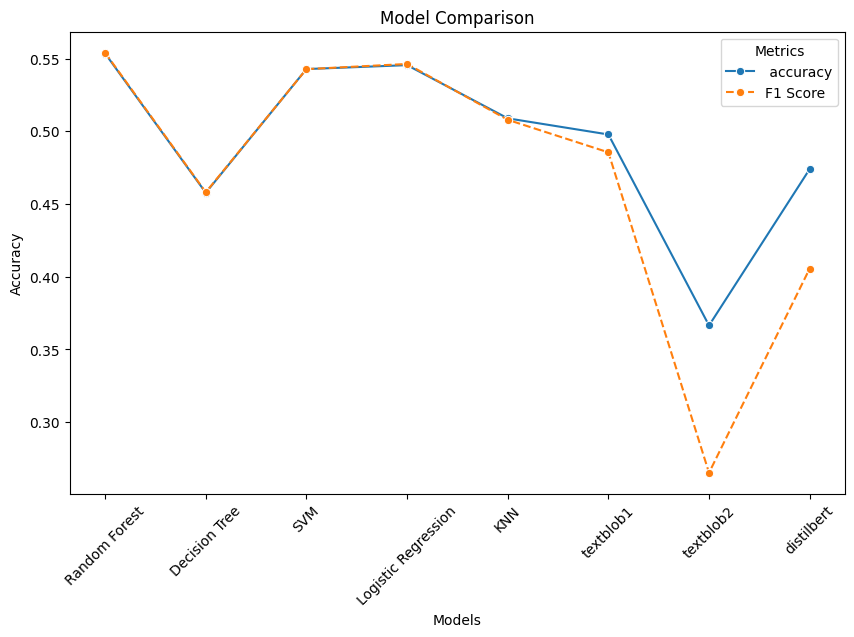

In [109]:
# Visualisation des résultats
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Random Forest": rf,
    "Decision Tree": dt,
    "SVM": svm,
    "Logistic Regression": lr,
    "KNN": knn,
    "textblob1": Blobber,
    "textblob2": TextBlob,
    "distilbert": distilled_student_sentiment_classifier
}

# Visualisation des résultats
plt.figure(figsize=(10, 6))
# sns.barplot(x=list(models.keys()), y=accuracy)
sns.lineplot(x=list(models.keys()), y=accuracy, marker='o',label=' accuracy')
sns.lineplot(x=list(models.keys()), y=fscores, marker='o', linestyle='--', label='F1 Score')
plt.legend(title='Metrics')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()

In [111]:
# le meilleur model
best_model_index = np.argmax(accuracy)
best_model_name = list(models.keys())[best_model_index]
best_model_accuracy = accuracy[best_model_index]
print(f"Best model: {best_model_name} with accuracy: {best_model_accuracy:.4f}")
# le meilleur model
best_fscore_index = np.argmax(fscores)
best_fscore_name = list(models.keys())[best_fscore_index]
best_fscore = fscores[best_fscore_index]
print(f"Best model by F1 Score: {best_fscore_name} with F1 Score: {best_fscore:.4f}")

# save the model
import pickle
with open("../src/utils/bestmodel.pkl", "wb") as f:
    pickle.dump(rf, f)
# import joblib
# joblib.dump(rf, '../src/utils/bestmodel.pkl')
# # save the label encoder
# joblib.dump(label_encoder, 'label_encoder.pkl')
# # save the vectorizer
# joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
# # save the word2vec model
# joblib.dump(model_w2v, 'word2vec_model.pkl')

Best model: Random Forest with accuracy: 0.5536
Best model by F1 Score: Random Forest with F1 Score: 0.5541


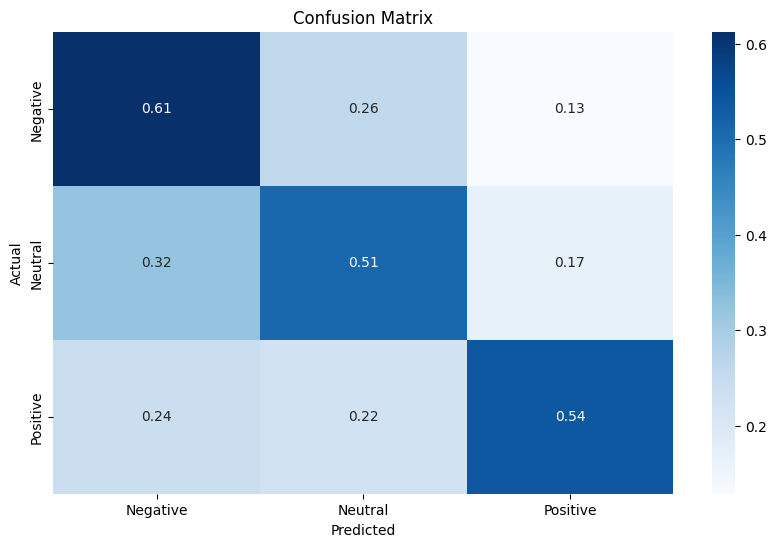

In [99]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_rf,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

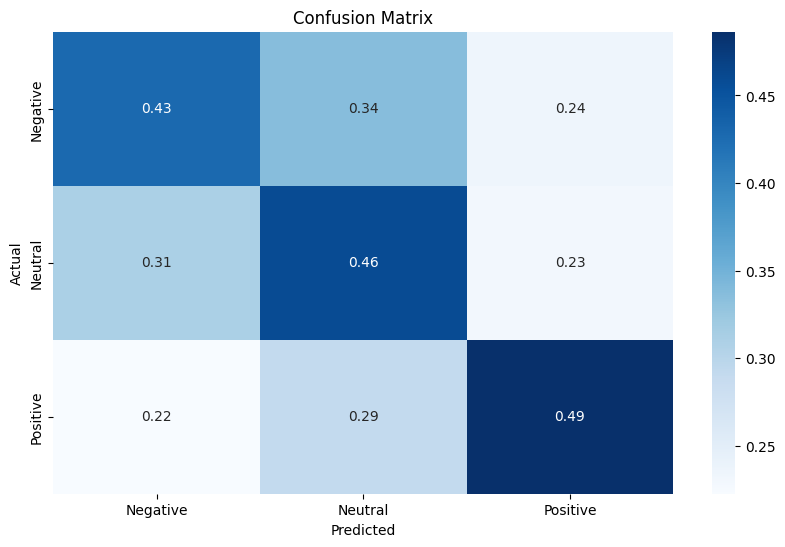

In [100]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_dt,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

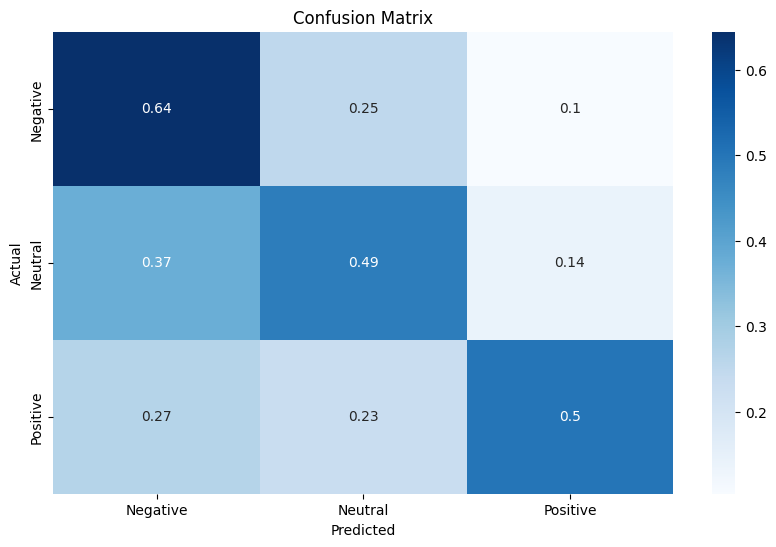

In [101]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_svm,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

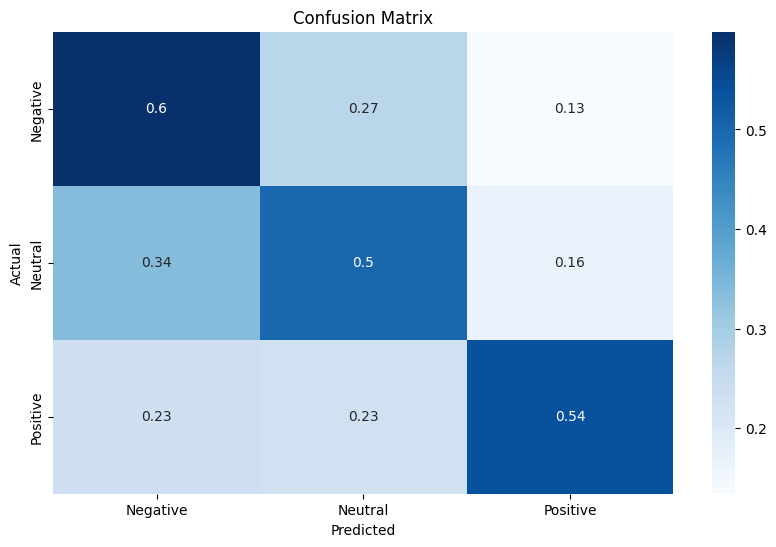

In [102]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_lr,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

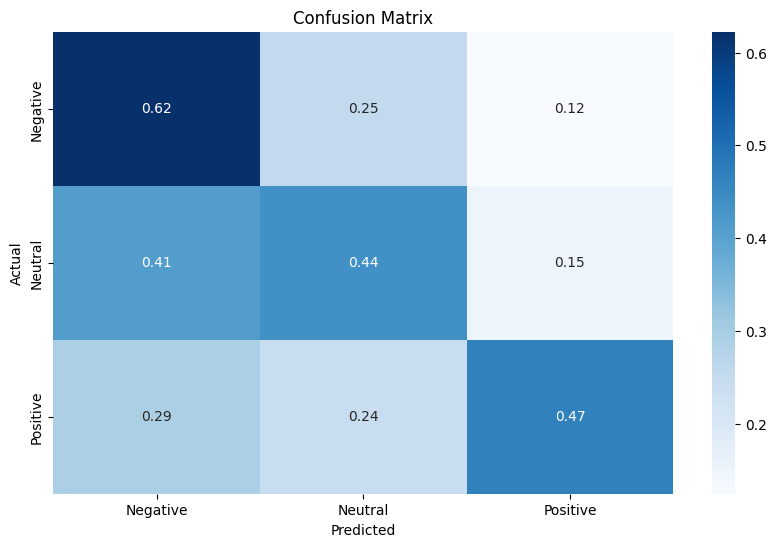

In [103]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_knn,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

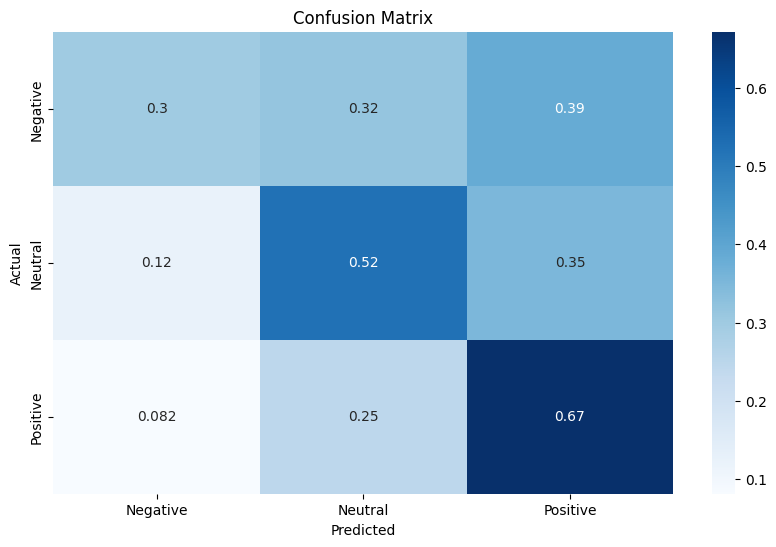

In [104]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_txtb ,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

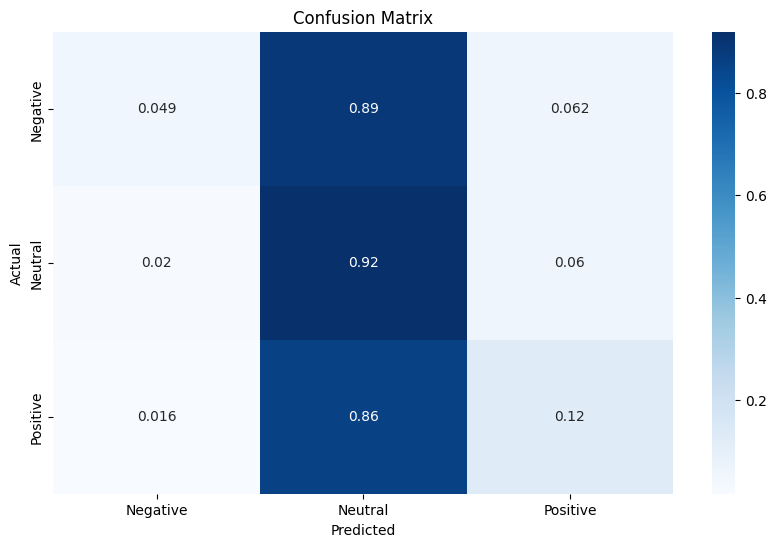

In [105]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_textblob ,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

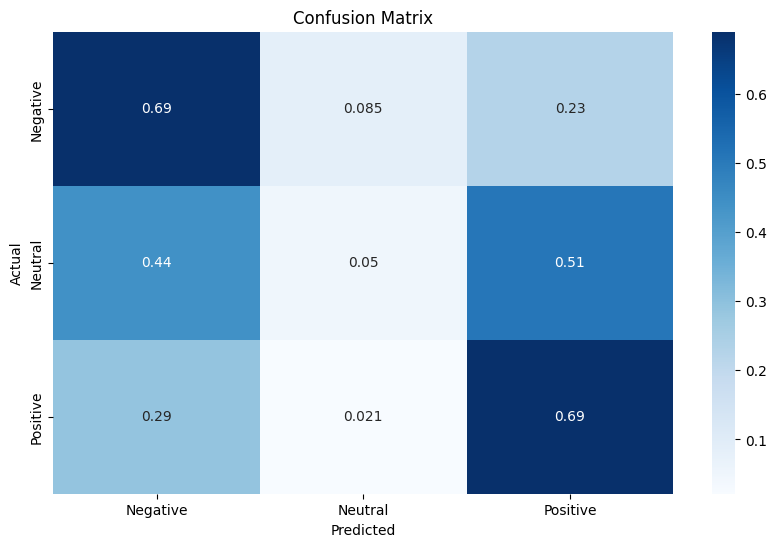

In [106]:
# Matrice de confusion
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_distilbert ,normalize='true' )
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Vader

In [7]:
! pip install --upgrade certifi


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [11]:
! pip install pip-system-certs


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [156]:
# import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [157]:
readSentiment = SentimentIntensityAnalyzer()
# df_train['vader_sentiment'] = df_train['text'].apply(lambda x: readSentiment.polarity_scores(x)['compound'])

In [158]:
def getSentiment(phrase):
    s = readSentiment.polarity_scores(phrase)
    if s['compound'] <= -0.05:
        sentiment = 0
    elif s['compound'] >= 0.05:
        sentiment = 1
    else:
        sentiment = 2
    return sentiment, s

In [162]:
sentiments = ['Negative', 'Positive', 'Neutral']
score=0
for index, row in df_train.iterrows():
    txt = row['text']
    label = row['label']
    pred = readSentiment.polarity_scores(txt)
    sent = sentiments[getSentiment(txt)[0]]
    # print( index,"\n",txt,"\n",label,"\n", pred,"\n",sent,"\n_____________")
    if sent == label:
        score += 1
print("Score: ", score, "/", len(df_sample), "=", score/len(df_sample)*100, "%")

IndexError: list index out of range

In [160]:
sentiments = ['Negative', 'Positive', 'Neutral']
score=0
for index, row in df_fr.iterrows():
    txt = row['text_fr']
    label = row['Sentiment']
    pred = readSentiment.polarity_scores(txt)
    sent = sentiments[getSentiment(txt)[0]]
    # print( index,"\n",txt,"\n",label,"\n", pred,"\n",sent,"\n_____________")
    if sent == label:
        score += 1
print("Score: ", score, "/", len(df_sample), "=", score/len(df_sample)*100, "%")

HTTPError: HTTP Error 500: Internal Server Error

# Text blob

In [22]:

# blob1 = tb(u"Quelle belle matinée")
# print(blob1.sentiment)

# blob2 = tb(u"C'est une voiture terribles.")
# print(blob2.sentiment)

# print(blob1.analyzer is blob2.analyzer)


In [23]:
# # text raw
# tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
# for i in df['comment'][:10]:
#     print(i)
#     print(tb(i).sentiment)
#     print(tb(i).sentiment[0])  # Affiche la polarité entre -1 et 1
#     print(tb(i).sentiment[1])  # Affiche la subjectivité entre 0 et 1
#     vs = tb(i).sentiment[0]
#     if (vs > 0):
#         print('Positive')
#     elif (vs < 0):
#         print('Negative')
#     else:
#         print('Neutral')
#     print("\n")

Merci à Odoo le sponsor cette vidéo ! Pour découvrir Odoo, clique juste ici : https://www.odoo.com/r/cAlx

Bonne découverte ou redécouverte à tous ! (et allez écouter Childish, c'est important)

bises 🙏
(0.31, 0.25000000000000006)
0.31
0.25000000000000006
Positive


Fait une vidéo sur Tyler the creator stp
(0.0, 0.0)
0.0
0.0
Neutral


Lol le disclaimer😂
(0.0, 0.0)
0.0
0.0
Neutral


où peut-on voir la série "Earn and Alfred" ???
(0.0, 0.0)
0.0
0.0
Neutral


C'est pas un re upload ? Impression de déjà vu (pas une critique foireuse, juste impression de déjà vu de fou)
(0.06999999999999999, 0.6166666666666667)
0.06999999999999999
0.6166666666666667
Positive


fais une vidéo sur tyler the creator stpppppppp
(0.0, 0.0)
0.0
0.0
Neutral


C est pas SEB c est un robot 😅😅😅
(0.0, 0.0)
0.0
0.0
Neutral


Super vidéo comme d’hab, mais je trouve comme souvent que c’est trop individualiste. Il arrive à tout faire aussi en grande partie parce que à chaque fois il est entouré des bonnes personnes qui so

In [24]:
# # text clean
# tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
# for i in df['comment_clean_lem'][:10]:
#     print(i)
#     print(tb(i).sentiment)
#     print(tb(i).sentiment[0])  # Affiche la polarité entre -1 et 1
#     print(tb(i).sentiment[1])  # Affiche la subjectivité entre 0 et 1
#     vs = tb(i).sentiment[0]
#     if (vs > 0):
#         print('Positive')
#     elif (vs < 0):
#         print('Negative')
#     else:
#         print('Neutral')
#     print("\n")

odoo sponsor decouvrir odoo clique decouverte redecouvrir aller ecouter childish important bise
(0.20000000000000004, 0.18333333333333335)
0.20000000000000004
0.18333333333333335
Positive


video_sur tyler_the_creator
(0.0, 0.0)
0.0
0.0
Neutral


mort_de_rire disclaimer
(0.0, 0.0)
0.0
0.0
Neutral


voir serie earn alfred
(0.0, 0.0)
0.0
0.0
Neutral


reupload impression deja_vu critique foireux impression deja_vu
(0.0, 0.75)
0.0
0.75
Neutral


video_sur tyler_the_creator stp
(0.0, 0.0)
0.0
0.0
Neutral


robot
(0.0, 0.0)
0.0
0.0
Neutral


super habitude trouver trop individualiste arriver grand partie fois entourer personne specialiser domaine
(0.25, 0.6)
0.25
0.6
Positive


coiffure rasage deranger monde contre gresillement sortie fois immersion
(0.0, 0.0)
0.0
0.0
Neutral


super vraiment contre faillir taper tete contre fois prononcer childish
(0.35, 0.7)
0.35
0.7
Positive




In [45]:
# # text clean
# score = 0
# tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
# for index, i in enumerate(df_sample['text_fr']):
#     #print(i)
#     #print(tb(i).sentiment)
#     #print(tb(i).sentiment[0])  # Affiche la polarité entre -1 et 1
#     #print(tb(i).sentiment[1])  # Affiche la subjectivité entre 0 et 1
#     vs = tb(i).sentiment[0]
#     sent = df_sample['Sentiment'].iloc[index]
#     if (vs > 0):
#         #print('Positive')
#         label = 'Positive'
#     elif (vs < 0):
#         #print('Negative')
#         label = 'Negative'
#     else:
#         #print('Neutral')
#         label = 'Neutral'
#     if label == sent:
#         score += 1
#     #print("\n______________________________________________")
# print("Score: ", score, "/", 1000, "=", score/1000*100, "%")

Score:  471 / 1000 = 47.099999999999994 %


# Emotion English DistilRoBERTa-base

In [32]:
from transformers import pipeline
classifier = pipeline(
    "text-classification", 
    model="j-hartmann/emotion-english-distilroberta-base", 
    return_all_scores=True,
    max_length=531)

/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0
/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [33]:
def get_sentiment(text : str, classifier, all=False ) -> str:
    res = classifier(text)[0]
    max_result = max(res, key=lambda x: x['score'])
    if all == True :
        return f"Label: {max_result['label']}, Score: {round(max_result['score'],2)}"
    else:
        return max_result['label']

for i in df_fr['text_fr'][:10]:
    print(i)
    print(get_sentiment(i, classifier=classifier))
    print("\n")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Quelqu'un sait quel film c'est ?
neutral


Le fait qu'ils se retiennent tout en étant aussi agressifs .
neutral


Vous attendez la prochaine vidéo ?
neutral


Merci pour la grande vidéo. Je ne comprends pas pourquoi la DB continue d'être accessible par le port 8080 lorsque la machine locale se connecte au conteneur docker par le port 5432? Ou, pourquoi n'est-il pas possible de faire des requêtes GET au port 5432 sur ma machine locale? Est-ce juste parce que le port 5432 est seulement le port utilisé pour connecter l'application à la base de données, mais l'application elle-même est toujours en charge HTTP à travers 8080?
neutral


C'est comme ça qu'on est en Amérique, à l'exception de New York et DC.
neutral


Dei løk de seim
fear


Numéro deux parce qu'il semble le meilleur avec elle
neutral


Dieu merci, nous n'avons plus à écouter son drivel
neutral


Nous avons vécu près d'une plage qui avait un chien errant. Nous la laissons tous la nourriture dehors pour elle. Un jour, sur ma pro

In [33]:
for i in df['comment_clean_lem'][:10]:
    print(i)
    print(get_sentiment(i, classifier=classifier))
    print("\n")


odoo sponsor decouvrir odoo clique decouverte redecouvrir aller ecouter childish important bise
neutral


video_sur tyler_the_creator
joy


mort_de_rire disclaimer
neutral


voir serie earn alfred
neutral


reupload impression deja_vu critique foireux impression deja_vu
neutral


video_sur tyler_the_creator stp
joy


robot
neutral


super habitude trouver trop individualiste arriver grand partie fois entourer personne specialiser domaine
neutral


coiffure rasage deranger monde contre gresillement sortie fois immersion
neutral


super vraiment contre faillir taper tete contre fois prononcer childish
anger




In [42]:
for index, i in enumerate(df_sample['text_fr']):
    print(i)
    print(get_sentiment(i, classifier=classifier))
    print("\n")


Cette vidéo était assez difficile à suivre et à comprendre.
disgust


Aimez votre spectacle et appréciez votre plateforme courageuse. Nous vous remercions.
fear


quel thème de couleur utilisez-vous S'il vous plaît me dire
fear


Celui qui s'inquiète de tout ce qu'ils ont fait... Mais !!! Si quelqu'un d'autre fait la même chose... alors et alors seulement c'est maintenant un crime !!! . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

RuntimeError: The expanded size of the tensor (531) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 531].  Tensor sizes: [1, 514]

# distilbert-base-multilingual-cased-sentiments-student

In [ ]:
distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    return_all_scores=True, max_length=512, 
)



Device set to use mps:0
/Users/carla/Desktop/GitHub/Projet-RNCP/.venv/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [62]:
for i in range(len(df_train2[:10])):
    text = df_train2['text_fr'].iloc[i]
    label = df_train2['Sentiment'].iloc[i]
    sentiment = get_sentiment(text, classifier=distilled_student_sentiment_classifier)
    print(text)
    print(sentiment)
    print(label)
    print("\n___________________________")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Quelqu'un sait quel film c'est ?
negative
Neutral

___________________________
Le fait qu'ils se retiennent tout en étant aussi agressifs .
negative
Positive

___________________________
Vous attendez la prochaine vidéo ?
negative
Neutral

___________________________
Merci pour la grande vidéo. Je ne comprends pas pourquoi la DB continue d'être accessible par le port 8080 lorsque la machine locale se connecte au conteneur docker par le port 5432? Ou, pourquoi n'est-il pas possible de faire des requêtes GET au port 5432 sur ma machine locale? Est-ce juste parce que le port 5432 est seulement le port utilisé pour connecter l'application à la base de données, mais l'application elle-même est toujours en charge HTTP à travers 8080?
positive
Neutral

___________________________
C'est comme ça qu'on est en Amérique, à l'exception de New York et DC.
negative
Positive

___________________________
Numéro deux parce qu'il semble le meilleur avec elle
positive
Positive

__________________________

In [48]:
for i in df['comment_clean_lem'][:10]:
    print(i)
    print(get_sentiment(i, classifier=distilled_student_sentiment_classifier))
    print("\n")


odoo sponsor decouvrir odoo clique decouverte redecouvrir aller ecouter childish important bise
negative


video_sur tyler_the_creator
positive


mort_de_rire disclaimer
negative


voir serie earn alfred
positive


reupload impression deja_vu critique foireux impression deja_vu
negative


video_sur tyler_the_creator stp
positive


robot
positive


super habitude trouver trop individualiste arriver grand partie fois entourer personne specialiser domaine
positive


coiffure rasage deranger monde contre gresillement sortie fois immersion
negative


super vraiment contre faillir taper tete contre fois prononcer childish
negative




In [52]:
score = 0
for index, i in enumerate(df_sample['text_fr'][:10]):
    #print(i)
    sent = get_sentiment(i, classifier=distilled_student_sentiment_classifier)
    label = df_sample['Sentiment'].iloc[index]
    #print(sent)
    #print("\n")
    if sent == label:
        score += 1
print("Score: ", score, "/", 10, "=", score/10*100, "%")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Score:  0 / 10 = 0.0 %


In [31]:
def get_polarity(text, classifier):
    vs = classifier(text).sentiment[0]
    if (vs > 0):
        return('Positive')
    elif (vs < 0):
        return('Negative')
    else:
        return('Neutral')

In [32]:
df["sentiment_label"] = df["comment"].astype(str).apply(
    lambda x: get_polarity(x, tb) # Polarité
)
df.head()

,channelId,videoId,author,publishedAt,comment,extractedAt,tokens_clean_lem,comment_clean_lem,sentiment_label
0,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@SEBFRIT,2025-06-02 19:21:45+00:00,Merci à Odoo le sponsor cette vidéo ! Pour déc...,2025-07-01 11:46:10,"['odoo', 'sponsor', 'decouvrir', 'odoo', 'cliq...",odoo sponsor decouvrir odoo clique decouverte ...,Positive
1,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@guishoo4700,2025-06-30 18:45:12+00:00,Fait une vidéo sur Tyler the creator stp,2025-07-01 11:46:10,"['video_sur', 'tyler_the_creator']",video_sur tyler_the_creator,Neutral
2,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Remi-B-Goode,2025-06-30 16:35:49+00:00,Lol le disclaimer😂,2025-07-01 11:46:10,"['mort_de_rire', 'disclaimer']",mort_de_rire disclaimer,Neutral
3,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@Guaph,2025-06-29 20:17:58+00:00,"où peut-on voir la série ""Earn and Alfred"" ???",2025-07-01 11:46:10,"['voir', 'serie', 'earn', 'alfred']",voir serie earn alfred,Neutral
4,UCK3inMNRNAVUleEbpDU1k2g,24Ob5JxhF4s,@rockman156,2025-06-29 19:05:12+00:00,C'est pas un re upload ? Impression de déjà vu...,2025-07-01 11:46:10,"['reupload', 'impression', 'deja_vu', 'critiqu...",reupload impression deja_vu critique foireux i...,Positive


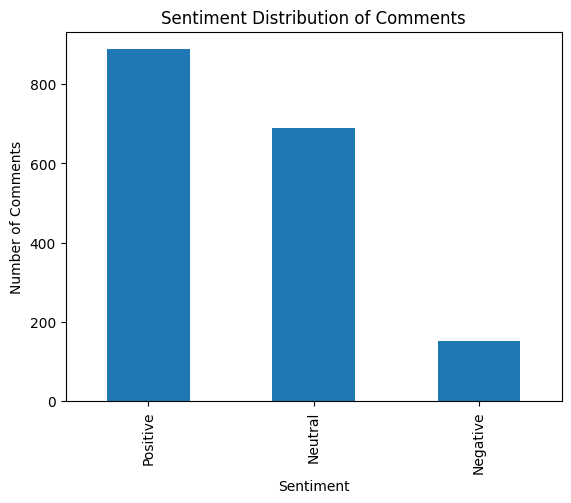

In [33]:
# distribution des commentaires en fonction des sentiments
df["sentiment_label"].value_counts().plot(kind='bar', title='Sentiment Distribution')
import matplotlib.pyplot as plt
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment Distribution of Comments')
plt.show()

# ALLOCINE MODEL

In [116]:
! pip install tensorflow
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine")
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine",from_tf=True)

nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached h5py-3.14.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.4/200.4 MB 5.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 7.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

ImportError: 
TFAutoModelForSequenceClassification requires the TensorFlow library but it was not found in your environment.
However, we were able to find a PyTorch installation. PyTorch classes do not begin
with "TF", but are otherwise identically named to our TF classes.
If you want to use PyTorch, please use those classes instead!

If you really do want to use TensorFlow, please follow the instructions on the
installation page https://www.tensorflow.org/install that match your environment.


In [11]:
# CamemBERT pour le français
from transformers import pipeline

# classifier = pipeline(
#     "sentiment-analysis",
#     model="tblard/tf-allocine",  # Spécialisé français
#     tokenizer="tblard/tf-allocine"
# )

# Ou pour multilingue
classifier = pipeline(
    "sentiment-analysis", 
    model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


# Ecriture du fichier

In [34]:
df.to_csv('database_sentiment_label.csv', index=False)